In [23]:
import random


def randgen(start,end,size):
    numlist = []
    random.seed()
    
    for i in range (size):
        numlist.append(random.randint(start,end))

    #print(numlist)

    return numlist


def InsertionSort(numlist, first, last):
    comp = 0
    for i in range(first, last+1):
        for j in range (i, 0, -1):
            comp += 1
            if (numlist[j]<numlist[j-1]):
                numlist = swap(numlist, j, j-1)
            else:
                break
    return comp
                
def swap(numlist, num1, num2):
    temp = numlist[num1]
    numlist[num1] = numlist[num2]
    numlist[num2] = temp
    return numlist


def MergeSort(numlist, first, last):
    comp = 0
    mid = (last+first) // 2
    if (last-first <= 0):
            return comp

    elif (last-first > 1):
        comp = MergeSort(numlist, first, mid) + MergeSort(numlist, mid+1, last)
    
    return (Merge(numlist, first, last) + comp)


def Merge(numlist, first, last):
    
    keyComp = 0
    mid = (first+last)//2
    n = first
    m = mid+1


    if (last-first <= 0 ):
        return 0

    # sub-array size
    size1 = m-first
    size2 = last-(m-1)

    arr1 = []
    arr2 = []

    for i in range(size1):
        arr1.append(numlist[n+i])

    for j in range(size2):
        arr2.append(numlist[m+j])
    
    # print("arr1: ")
    # print(arr1)
    # print("arr2: ")
    # print(arr2)
    # print("\n")

    ind1 = ind2 = 0


    while (ind1<size1 and ind2<size2): # while both halfs are not empty
        
        # case 1: 2nd half's first element smaller
        if arr1[ind1]>arr2[ind2]:
            numlist[n]=arr2[ind2]
            ind2 += 1      # move 2nd half's pointer forward
            #print(numlist)
        # case 2: 1st half's first element smaller
        elif (arr1[ind1]<=arr2[ind2]):
            numlist[n]=arr1[ind1]
            ind1 += 1      # move 1st half's pointer forward

        n += 1
        keyComp += 1

        
    while (ind1<size1):
        numlist[n]=arr1[ind1]
        n += 1
        ind1 += 1

    while (ind2<size2):
        numlist[n]=arr2[ind2]
        n += 1
        ind2 += 1
     
    return keyComp

def MergeInsertSort (numlist, first, last, S):

    comp = 0
    size = last-first+1
    
    if (size<=S):
        comp += InsertionSort(numlist, first, last)
        return comp
    
    else:
        
        mid = (last+first) // 2
        if (last-first <= 0):
                return comp

        elif (last-first > 1):
            comp = MergeInsertSort(numlist, first, mid, S) + MergeInsertSort(numlist, mid+1, last, S)

        return (Merge(numlist, first, last) + comp)

# OLD BELOW
# -------------------------------------------------------------- #
    # size = last-first+1

    # if (size<S):
    #     InsertionSort(numlist, first, last)
                      
    # else:
    
    #     if (last-first <= 0):
    #         return numlist

    #     elif (last-first > 1):
            
    #         mid = last+first // 2

    #         MergeInsertSort(numlist, first,mid)
    #         MergeInsertSort(numlist, mid+1, last)

    #     Merge(numlist, first, last)
    #     return numlist
# -------------------------------------------------------------- #
        

def main():

    arr = [14, 40, 31, 28, 3, 15, 17, 51]
    #arr = randgen(1, 10000000, 10000000)
    #arr = randgen(1, 100, 10)

    
    arrcopy = list(arr)
    print (arrcopy)
    #print(len(arr))

    ##### Insertion sort #####
    count = MergeInsertSort(arrcopy, 0, len(arr)-1, 5)

    ##### Merge Sort #####
    #arrcopy.sort()
    print(arrcopy)
    #print(arr)
    print("number of comp for Insertion Sort= " + str(count))
    
    print(arr)
    numOfComp=MergeSort(arr, 0, len(arr)-1)
    print("number of comp Merge Sort= " + str(numOfComp))
    print(len(arr))

if __name__=="__main__":
    main()

[14, 40, 31, 28, 3, 15, 17, 51]
[3, 14, 15, 17, 28, 31, 40, 51]
number of comp for Insertion Sort= 23
[14, 40, 31, 28, 3, 15, 17, 51]
number of comp Merge Sort= 16
8


### With the value of `S fixed`, plot the number of key comparisons over different sizes of the input list n.

In [24]:
# S fixed = 15, varies n
# comparison = []
# n = [1000, 5000, 10000, 50000, 100000, 500000, 1000000, 5000000, 10000000]

# for i in range(len(n)):
#     arr = randgen(1, 100, n[i])
#     count = MergeInsertSort(arr, 0, len(arr)-1, 15)
#     comparison.append(count)

# print("Number of key comparisons: ")
# for i in comparison:
#     print(i)

comparison = []
n = [1000, 1500, 2000, 5000, 10000]

for i in range(len(n)):
    arr = randgen(1, 100, n[i])
    count = MergeInsertSort(arr, 0, len(arr)-1, 15)
    comparison.append(count)

print("Number of key comparisons: ")
for i in comparison:
    print(i)

Number of key comparisons: 
246727
560652
984438
6136067
24963428


<AxesSubplot:xlabel='n-size array', ylabel='Number of key comparisons'>

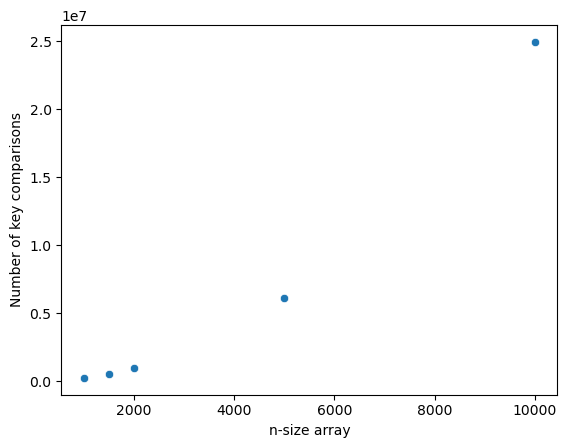

In [25]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

keyComp = pd.DataFrame({"Number of key comparisons" : comparison})
keyComp['n-size array'] = n

# Set the values of n as the index
keyComp.set_index('n-size array', inplace = True)

# Print keyComp
keyComp

# Plot a jointplot to visualise the comparison
sb.scatterplot(data = keyComp, x = 'n-size array', y = 'Number of key comparisons')

### With the input size `n fixed`, plot the number of key comparisons over different values of S.